In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Download BTC-USD data from Yahoo Finance
data = yf.download("BTC-USD", start="2024-01-01", end="2025-02-03")

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


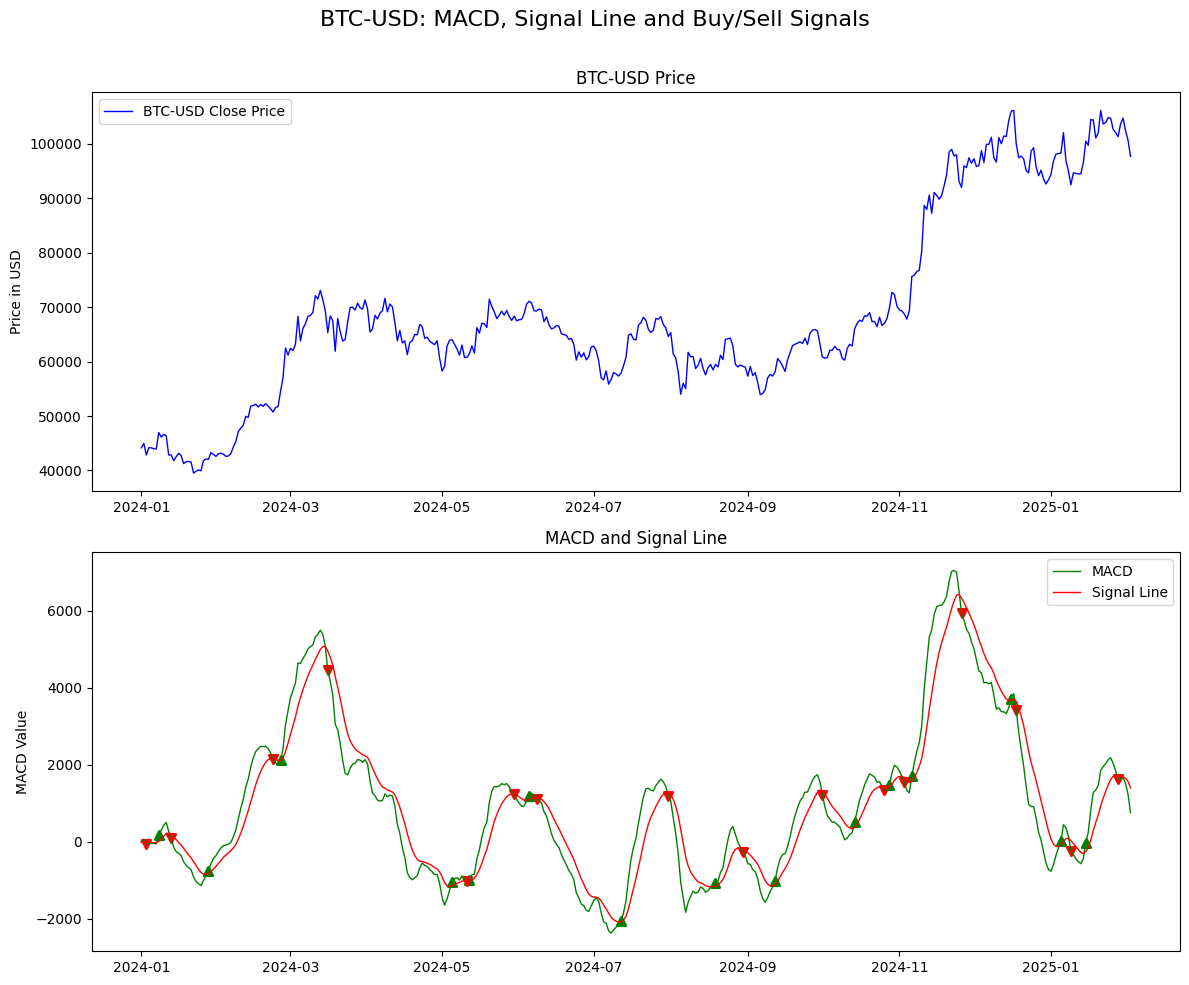

In [ ]:
# Remove the second level of the MultiIndex ('BTC-USD') and keep only the first level ('Close', 'Open', etc.)
data.columns = data.columns.droplevel(1)

# Calculate the 12-day and 26-day EMAs
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line (difference between the 12-day and 26-day EMAs)
data['MACD'] = data['EMA12'] - data['EMA26']

# Calculate the Signal Line (9-day EMA of the MACD)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Generate Buy and Sell signals based on MACD crossovers
data['Buy_Signal'] = (data['MACD'] > data['Signal_Line']) & (data['MACD'].shift(1) < data['Signal_Line'].shift(1))
data['Sell_Signal'] = (data['MACD'] < data['Signal_Line']) & (data['MACD'].shift(1) > data['Signal_Line'].shift(1))

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the price on the first axis (ax1)
ax1.plot(data.index, data['Close'], label='BTC-USD Close Price', color='blue', linewidth=1)
ax1.set_title('BTC-USD Price')
ax1.set_ylabel('Price in USD')
ax1.legend()

# Plot the MACD and Signal Line on the second axis (ax2)
ax2.plot(data.index, data['MACD'], label='MACD', color='green', linewidth=1)
ax2.plot(data.index, data['Signal_Line'], label='Signal Line', color='red', linewidth=1)
ax2.set_title('MACD and Signal Line')
ax2.set_ylabel('MACD Value')
ax2.legend()

# Plot Buy and Sell signals on the MACD chart
ax2.scatter(data.index[data['Buy_Signal']], data['MACD'][data['Buy_Signal']], marker='^', color='green', label='Buy Signal', alpha=1, lw=2)
ax2.scatter(data.index[data['Sell_Signal']], data['MACD'][data['Sell_Signal']], marker='v', color='red', label='Sell Signal', alpha=1, lw=2)

# Set the figure title and adjust layout
fig.suptitle('BTC-USD: MACD, Signal Line and Buy/Sell Signals', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make space for the suptitle

# Show the plot
plt.show()

Buy: 2024-01-08 00:00:00, Price: 46970.50390625
Sell: 2024-01-13 00:00:00, Price: 42842.3828125
Buy: 2024-01-28 00:00:00, Price: 42035.59375
Sell: 2024-02-23 00:00:00, Price: 50731.94921875
Buy: 2024-02-26 00:00:00, Price: 54522.40234375
Sell: 2024-03-16 00:00:00, Price: 65315.1171875
Buy: 2024-05-05 00:00:00, Price: 64031.1328125
Sell: 2024-05-11 00:00:00, Price: 60793.7109375
Buy: 2024-05-12 00:00:00, Price: 61448.39453125
Sell: 2024-05-30 00:00:00, Price: 68364.9921875
Buy: 2024-06-05 00:00:00, Price: 71082.8203125
Sell: 2024-06-08 00:00:00, Price: 69305.7734375
Buy: 2024-07-12 00:00:00, Price: 57899.46484375
Sell: 2024-07-31 00:00:00, Price: 64619.25
Buy: 2024-08-19 00:00:00, Price: 59493.453125
Sell: 2024-08-30 00:00:00, Price: 59119.4765625
Buy: 2024-09-12 00:00:00, Price: 58127.01171875
Sell: 2024-10-01 00:00:00, Price: 60837.0078125
Buy: 2024-10-14 00:00:00, Price: 66046.125
Sell: 2024-10-26 00:00:00, Price: 67014.6953125
Buy: 2024-10-28 00:00:00, Price: 69907.7578125
Sell: 202

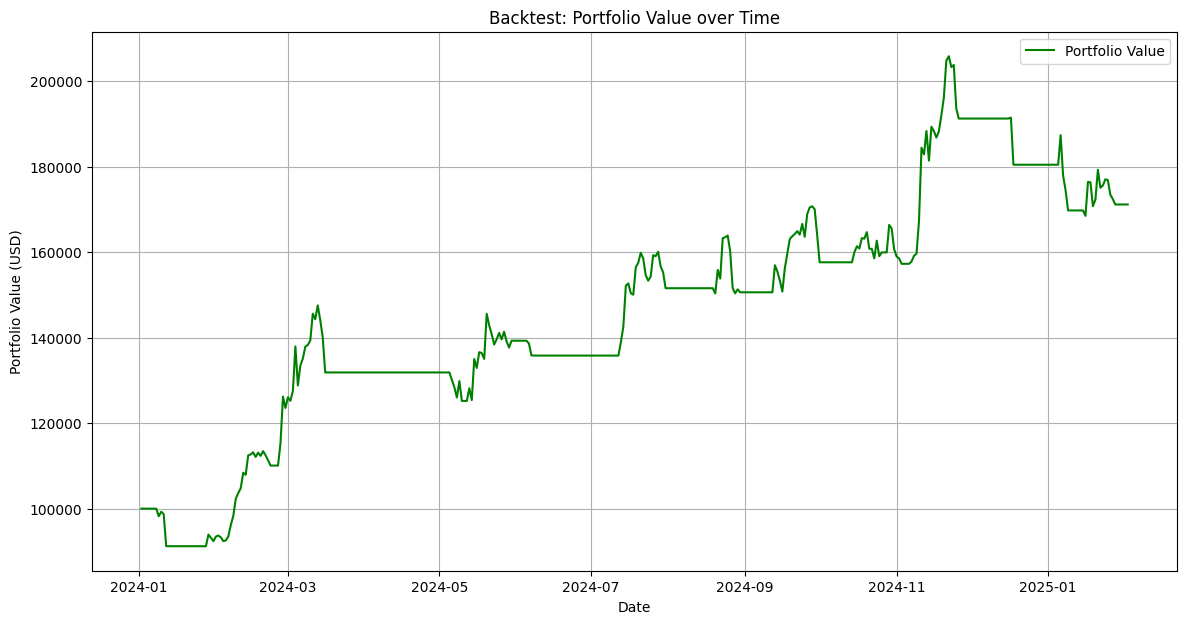

In [ ]:
# Backtest the strategy
initial_cash = 100000  # Initial portfolio value
cash = initial_cash  # Cash available for trading
holdings = 0  # BTC holdings
portfolio_value = []  # Track portfolio value over time
buy_price = 0  # To track the buy price for calculation of profit/loss

for i in range(1, len(data)):
    # Check for Buy signal
    if data['Buy_Signal'].iloc[i] and cash >= data['Close'].iloc[i]:  # Ensure we have enough cash to buy
        # Calculate how much BTC can be bought with the available cash
        holdings = cash / data['Close'].iloc[i]
        cash = 0  # Spend all cash to buy BTC
        buy_price = data['Close'].iloc[i]
        print(f"Buy: {data.index[i]}, Price: {buy_price}")

    # Check for Sell signal
    elif data['Sell_Signal'].iloc[i] and holdings > 0:  # Ensure we have BTC to sell
        # Sell all BTC and calculate the proceeds
        cash = holdings * data['Close'].iloc[i]
        holdings = 0  # Sold all BTC
        sell_price = data['Close'].iloc[i]
        print(f"Sell: {data.index[i]}, Price: {sell_price}")

    # Calculate current portfolio value (cash + value of holdings)
    portfolio_value.append(cash + holdings * data['Close'].iloc[i])

# Final portfolio value
final_value = cash + holdings * data['Close'].iloc[-1]
total_return = (final_value - initial_cash) / initial_cash * 100

# Calculate BTC's performance metrics
btc_initial_price = data['Close'].iloc[0]
btc_final_price = data['Close'].iloc[-1]
btc_percentage_change = ((btc_final_price - btc_initial_price) / btc_initial_price) * 100

# Print backtest results
print(f"\nBacktest Summary:")
print(f"Initial Portfolio Value: ${initial_cash}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"BTC Percentage Change: {btc_percentage_change:.2f}%")
print(f"Total Number of Trades: {data['Buy_Signal'].sum() + data['Sell_Signal'].sum()}")
print(f"Total Buy Signals: {data['Buy_Signal'].sum()}")
print(f"Total Sell Signals: {data['Sell_Signal'].sum()}")

# Plot the portfolio value over time
plt.figure(figsize=(14,7))
plt.plot(data.index[1:], portfolio_value, label='Portfolio Value', color='green')
plt.title('Backtest: Portfolio Value over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend(loc='best')
plt.grid(True)
plt.show()